In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import scipy

# Facial feature extraction for single emotion without time series analysis

## Data extraction

In [3]:
path = "/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Single_emotions/"

# List all the .csv files in the folder
single_emo_files = glob.glob(path + "/*.csv")

single_emo_dfs = []
num_deleted = 0

for filename in single_emo_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    

    # check the ratio of rows with confidence >= 0.98 to the total number of rows
    if len(df[df["confidence"]<0.98])/len(df) >= 0.15:
        # print the filename and delete the df variable
        #print(filename)
        del df
        num_deleted += 1
    else:
        # select confidence >= 0.98 & success = 1
        df = df.loc[(df["confidence"]>= 0.98) & (df["success"]== 1 ) ] 
        # drop columns that does not contain facial feature information
        df = df.drop(columns=["confidence","success","frame", "face_id", "timestamp"])
        
        # drop binary AU features
        cols_to_drop = df.filter(regex='AU.*_c').columns

        df = df.drop(columns=cols_to_drop)
        print(df.shape)
        

        # Feature selection
        # only AU
        #df = df.iloc[:, np.concatenate([range(674,691)])]


        df = df.fillna(method='ffill') # forward fill missing values
        df = df.fillna(method='bfill') # backward fill missing values
            
        single_emo_dfs.append(df)
        #print(filename)
        
print(f"{num_deleted} dataframes were deleted.")

print(len(single_emo_dfs))

(33, 691)
(469, 691)
(240, 691)
(339, 691)
(222, 691)
(187, 691)
(197, 691)
(37, 691)
(102, 691)
(203, 691)
(300, 691)
(34, 691)
(196, 691)
(200, 691)
(242, 691)
(171, 691)
(232, 691)
(92, 691)
(208, 691)
(246, 691)
(66, 691)
(51, 691)
(95, 691)
(132, 691)
(215, 691)
(110, 691)
(235, 691)
(89, 691)
(80, 691)
(160, 691)
(293, 691)
(61, 691)
(69, 691)
(359, 691)
(181, 691)
(232, 691)
(163, 691)
(159, 691)
(66, 691)
(73, 691)
(81, 691)
(59, 691)
(241, 691)
(63, 691)
(91, 691)
(167, 691)
(70, 691)
(187, 691)
(375, 691)
(98, 691)
(199, 691)
(165, 691)
(95, 691)
(72, 691)
(132, 691)
(191, 691)
(490, 691)
(65, 691)
(215, 691)
(357, 691)
(92, 691)
(99, 691)
(74, 691)
(74, 691)
(148, 691)
(108, 691)
(169, 691)
(224, 691)
(75, 691)
(93, 691)
(69, 691)
(292, 691)
(104, 691)
(58, 691)
(137, 691)
(64, 691)
(199, 691)
(70, 691)
(96, 691)
(131, 691)
(86, 691)
(150, 691)
(252, 691)
(147, 691)
(80, 691)
(61, 691)
(116, 691)
(75, 691)
(62, 691)
(74, 691)
(68, 691)
(102, 691)
(113, 691)
(162, 691)
(57, 6

In [4]:
single_emo_dfs

[    gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  gaze_1_z  gaze_angle_x  \
 0   0.204330  0.296434 -0.932940 -0.045668  0.242337 -0.969117         0.083   
 1   0.208943  0.299067 -0.931076 -0.061539  0.249252 -0.966481         0.078   
 2   0.183605  0.277425 -0.943040 -0.066085  0.253466 -0.965084         0.062   
 3   0.167277  0.276816 -0.946251 -0.078546  0.256704 -0.963293         0.046   
 4   0.154485  0.302883 -0.940423 -0.084918  0.304804 -0.948622         0.037   
 5   0.147549  0.306449 -0.940382 -0.087348  0.304438 -0.948519         0.032   
 6   0.145391  0.314426 -0.938082 -0.105031  0.320909 -0.941268         0.021   
 7   0.142508  0.319723 -0.936733 -0.086929  0.323159 -0.942344         0.030   
 8   0.146313  0.334601 -0.930932 -0.094663  0.332053 -0.938499         0.028   
 9   0.149255  0.336739 -0.929693 -0.082050  0.336593 -0.938069         0.036   
 10  0.144492  0.338469 -0.929818 -0.097911  0.339558 -0.935475         0.025   
 11  0.182556  0.364977 -0.9

In [7]:
# stattistical functions
# define a dictionary of functions to apply to each column
functions = {'mean': 'mean',
             'std': 'std',
             '20th_percentile': lambda x: x.quantile(0.2),
             '50th_percentile': lambda x: x.quantile(0.5),
             '80th_percentile': lambda x: x.quantile(0.8),
             '2080_range': lambda x: x.quantile(0.8) - x.quantile(0.2)}


In [8]:
# loop over each column
# loop over each column
for col in single_emo_dfs[0].columns:
    # apply the functions to the column using the agg() method
    result = single_emo_dfs[0][col].agg(functions)
    # rename the resulting columns using the rename() method
    result = result.rename(index={'mean': f'{col}_mean',
                                  'std': f'{col}_stddevNorm',
                                  '20th_percentile': f'{col}_percentile20.0',
                                  '50th_percentile': f'{col}_percentile50.0',
                                  '80th_percentile': f'{col}_percentile80.0',
                                  '2080_range': f'{col}_iqr60_80-20'})
    # merge the result back to the original DataFrame
    single_emo_dfs[0] = pd.concat([single_emo_dfs[0].drop(col, axis=1), result], axis=1)


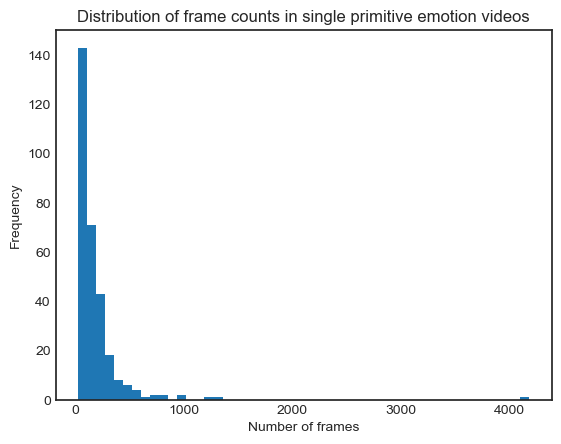

In [13]:
dfs_len = [len(df) for df in single_emo_dfs]
plt.style.use('seaborn-white')
plt.hist(dfs_len, bins=50)

plt.xlabel('Number of frames')
plt.ylabel('Frequency')
plt.title('Distribution of frame counts in single primitive emotion videos')
plt.show()

In [ ]:
single_emo_dfs[1]

In [ ]:
df1_mean = single_emo_dfs[1].mean()
df1_cv = single_emo_dfs[1].std() / single_emo_dfs[1].mean()
df1_20 = single_emo_dfs[1].quantile(0.2)
df1_50 = single_emo_dfs[1].quantile(0.5)
df1_80 = single_emo_dfs[1].quantile(0.8)
df1_range_2080 = single_emo_dfs[1].quantile(0.8) - df.quantile(0.2)

result = pd.concat([df1_mean, df1_cv, df1_20,df1_50, df1_80, df1_range_2080],axis=1).T
result.index = ['Mean', 'Coefficient of Variation', '20th Percentile', '50th Percentile', '80th Percentile', 'Percentile Range']
result

In [ ]:
col1 = result.iloc[:, 0]
col2 = result.iloc[:, 1]
col3 = result.iloc[:, 2]
col4 = result.iloc[:, 3]
col5 = result.iloc[:, 4]
col6 = result.iloc[:, 5]
col7 = result.iloc[:, 6]
col8 = result.iloc[:, 7]
col9 = result.iloc[:, 8]
col10 = result.iloc[:, 9]
col11 = result.iloc[:, 10]
col12 = result.iloc[:, 11]
col13 = result.iloc[:, 12]
col14 = result.iloc[:, 13]
col15 = result.iloc[:, 14]
col16 = result.iloc[:, 15]
col17 = result.iloc[:, 16]

result_1d = np.concatenate([col1.values, col2.values, col3.values, col4.values, col5.values, col6.values, col7.values, col8.values, col9.values, col10.values, col11.values, col12.values, col13.values, col14.values, col15.values, col16.values,col17.values])

result_1d = pd.DataFrame(result_1d)
result_1d = result_1d.T

In [256]:
result_1d

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.383198,0.625661,0.17,0.36,0.56,0.56,0.136375,1.800127,0.0,0.0,...,0.0,0.0,0.0,0.0,1.748316,0.438319,1.04,1.51,2.62,2.62


In [257]:
new_cols = []
for i in range(17):
    prefix = f'AU{i+1:02d}_r_'
    new_cols += [f'{prefix}{stat}' for stat in ['mean', 'std', '20_percentile', '50_percentile', '80_percentile', '2080_range']]

result_1d.columns = new_cols


In [258]:
result_1d

,AU01_r_mean,AU01_r_std,AU01_r_20_percentile,AU01_r_50_percentile,AU01_r_80_percentile,AU01_r_2080_range,AU02_r_mean,AU02_r_std,AU02_r_20_percentile,AU02_r_50_percentile,...,AU16_r_20_percentile,AU16_r_50_percentile,AU16_r_80_percentile,AU16_r_2080_range,AU17_r_mean,AU17_r_std,AU17_r_20_percentile,AU17_r_50_percentile,AU17_r_80_percentile,AU17_r_2080_range
0,0.383198,0.625661,0.17,0.36,0.56,0.56,0.136375,1.800127,0.0,0.0,...,0.0,0.0,0.0,0.0,1.748316,0.438319,1.04,1.51,2.62,2.62


In [23]:
#Extract functional features
single_emo_functional_features_results = []

for df, file in zip(single_emo_dfs, single_emo_files):

    # Extract filename from filepath
    filename = os.path.basename(file)
    #print(filename)
    mean = df.mean()
    cv = df.std() / df.mean()
    percentile_20 = df.quantile(0.2)
    percentile_50 = df.quantile(0.5)
    percentile_80 = df.quantile(0.8)
    range_20_80 = df.quantile(0.8) - df.quantile(0.2)
    

    result = pd.concat([mean, cv, percentile_20, percentile_50, percentile_80, range_20_80],axis=1).T
  
    
    # Rename columns with filename as prefix
    prefix = filename[:-4] # remove ".csv" extension
    prefix = prefix.split('_', 1)[1]
    
    result.index = [f"{prefix}", f"{prefix}", f"{prefix}", f"{prefix}", f"{prefix}", f"{prefix}"]

    print(result)


    single_emo_functional_features_results.append(result)
    
print(len(single_emo_functional_features_results))

         gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  gaze_1_z  \
ang_v_3  0.149249  0.332362 -0.930700 -0.098441  0.318903 -0.942042   
ang_v_3  0.144369  0.071075 -0.008872 -0.192779  0.085795 -0.010399   
ang_v_3  0.135043  0.316545 -0.933309 -0.117309  0.314598 -0.944161   
ang_v_3  0.141969  0.336739 -0.931744 -0.100206  0.328973 -0.938817   
ang_v_3  0.164280  0.341300 -0.929314 -0.085119  0.335343 -0.935176   
ang_v_3  0.029237  0.024755  0.003995  0.032191  0.020745  0.008985   

         gaze_angle_x  gaze_angle_y  eye_lmk_x_0  eye_lmk_x_1  ...    AU10_r  \
ang_v_3      0.027091      0.334636   888.590909   893.084848  ...  0.676364   
ang_v_3      0.703910      0.076157     0.014140     0.014074  ...  0.250195   
ang_v_3      0.012000      0.327600   873.220000   877.860000  ...  0.572000   
ang_v_3      0.023000      0.343000   890.400000   894.800000  ...  0.640000   
ang_v_3      0.036600      0.348200   901.880000   906.220000  ...  0.772000   
ang_v_3      0.024600 

In [24]:
single_emo_functional_features_results[68]

,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
disg_v_4,-0.040958,0.213651,-0.975994,-0.065377,0.223926,-0.972307,-0.054467,0.220933,908.374667,911.864000,...,0.695600,0.448933,0.0,0.953600,0.044667,0.462133,0.000133,1.343067,0.266000,0.0
disg_v_4,-0.121505,0.042741,-0.001989,-0.121218,0.051943,-0.002507,-0.079934,0.043116,0.002204,0.002248,...,0.529126,0.492066,NaN,0.156623,1.729609,0.439900,8.660254,0.274751,0.563774,NaN
disg_v_4,-0.045723,0.206928,-0.977557,-0.072356,0.213090,-0.974595,-0.058000,0.213000,906.260000,909.760000,...,0.338000,0.260000,0.0,0.810000,0.000000,0.300000,0.000000,1.028000,0.130000,0.0
disg_v_4,-0.040028,0.212643,-0.976301,-0.067104,0.220317,-0.972875,-0.055000,0.217000,908.400000,911.900000,...,0.660000,0.390000,0.0,0.950000,0.000000,0.420000,0.000000,1.240000,0.280000,0.0
disg_v_4,-0.036850,0.220670,-0.974572,-0.056651,0.236186,-0.969954,-0.051000,0.232000,910.000000,913.520000,...,1.112000,0.636000,0.0,1.076000,0.112000,0.622000,0.000000,1.754000,0.382000,0.0
disg_v_4,0.008874,0.013742,0.002985,0.015705,0.023096,0.004641,0.007000,0.019000,3.740000,3.760000,...,0.774000,0.376000,0.0,0.266000,0.112000,0.322000,0.000000,0.726000,0.252000,0.0


In [270]:
# Concate results to a single dataframe
single_emo_facial_no_time_series_output = pd.concat(single_emo_functional_features_results)
#single_emo_facial_no_time_series_output = single_emo_facial_no_time_series_output.T

single_emo_facial_no_time_series_output = single_emo_facial_no_time_series_output.reset_index().rename(columns={'index': 'emotion'})
single_emo_facial_no_time_series_output.fillna(0,inplace=True)

In [271]:
single_emo_facial_no_time_series_output

,emotion,AU01_r_mean,AU01_r_std,AU01_r_20_percentile,AU01_r_50_percentile,AU01_r_80_percentile,AU01_r_2080_range,AU02_r_mean,AU02_r_std,AU02_r_20_percentile,...,AU16_r_20_percentile,AU16_r_50_percentile,AU16_r_80_percentile,AU16_r_2080_range,AU17_r_mean,AU17_r_std,AU17_r_20_percentile,AU17_r_50_percentile,AU17_r_80_percentile,AU17_r_2080_range
0,ang,1.846061,0.248272,1.632,1.950,2.132,0.500,3.015758,0.191932,3.018,...,1.684,2.010,2.242,0.558,0.373636,0.802887,0.120,0.32,0.620,0.500
1,sad,0.383198,0.625661,0.170,0.360,0.560,0.390,0.136375,1.800127,0.000,...,0.000,0.000,0.000,0.000,1.748316,0.438319,1.040,1.51,2.620,1.580
2,fea,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,...,0.000,0.020,0.534,0.534,0.123167,2.365804,0.000,0.00,0.144,0.144
3,sad,0.700826,0.613900,0.180,0.800,1.084,0.904,0.964661,0.429049,0.626,...,0.100,0.400,0.968,0.868,0.556018,1.389398,0.046,0.32,0.724,0.678
4,sad,0.685360,0.332956,0.552,0.720,0.860,0.308,1.794279,0.198383,1.630,...,0.000,0.000,0.000,0.000,1.767342,0.525172,1.022,1.56,2.508,1.486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,disg,0.297981,0.444391,0.200,0.300,0.410,0.210,0.431250,0.191289,0.370,...,0.000,0.000,0.000,0.000,0.167404,2.610058,0.000,0.00,0.230,0.230
299,ang,0.405500,0.605071,0.168,0.395,0.626,0.458,0.006500,3.947828,0.000,...,0.100,0.215,0.292,0.192,0.166375,3.384699,0.000,0.00,0.000,0.000
300,ang,0.430923,1.008212,0.000,0.340,0.850,0.850,0.632140,0.848616,0.000,...,0.000,0.000,0.230,0.230,0.145092,1.778194,0.000,0.00,0.310,0.310
301,hap,0.100362,1.657198,0.000,0.000,0.250,0.250,0.000000,0.000000,0.000,...,0.530,0.750,1.060,0.530,0.429674,1.973105,0.000,0.00,0.500,0.500


## Preprocessing

In [272]:
cols_to_normalize = single_emo_facial_no_time_series_output.columns.difference(['emotion'])

# mix-max normalization
#single_emo_facial_no_time_series_output[cols_to_normalize] = single_emo_facial_no_time_series_output[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# z score normalization
single_emo_facial_no_time_series_output[cols_to_normalize] = single_emo_facial_no_time_series_output[cols_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

In [124]:
# more than 1 row
single_emo_facial_no_time_series_6_output = single_emo_facial_no_time_series_output
single_emo_facial_no_time_series_6_output



,emotion,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,ang,0.034507,0.172575,-0.636632,-0.000907,0.423607,-0.681087,0.026812,0.329983,0.587189,...,-0.274848,-0.082332,0.247422,0.524098,0.384769,0.335507,-0.351378,-0.141354,1.412909,-0.257705
1,ang,0.033998,-0.180164,1.384301,-0.050094,-0.498916,1.378677,0.354679,-0.388865,-1.438841,...,-0.704516,-0.543308,-0.451960,-0.300291,-0.490040,-0.557027,1.415457,-0.721727,-0.620105,0.118530
2,ang,0.033026,0.151222,-0.642351,-0.010744,0.406572,-0.685773,0.019501,0.310415,0.552142,...,-0.380068,-0.121632,-0.069978,0.125823,0.265722,0.106912,-0.361294,-0.189015,1.105460,-0.480016
3,ang,0.033748,0.178484,-0.638921,-0.001827,0.463461,-0.673958,0.024830,0.353243,0.591314,...,-0.311510,-0.053467,0.205387,0.363770,0.387702,0.344406,-0.361294,-0.145641,1.477177,-0.304717
4,ang,0.036074,0.184641,-0.633593,0.006040,0.488670,-0.665909,0.031418,0.367705,0.617489,...,-0.178426,-0.004528,0.553215,0.881655,0.465150,0.589562,-0.361294,-0.041918,1.741711,-0.041769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,fea,0.047496,0.055906,1.350079,-0.031552,0.023227,1.343764,-0.305131,0.066955,-1.438822,...,-0.818811,-0.665598,-0.543886,2.614657,-0.619116,-0.559540,3.930724,-0.691104,0.162926,1.358905
1814,fea,0.027743,0.055613,-0.710175,-0.038520,0.136010,-0.715259,-0.008208,0.105172,0.609007,...,1.682735,2.313084,1.114296,-0.783975,-0.619116,0.203953,-0.361294,1.464886,-0.814698,-0.585195
1815,fea,0.029308,0.082567,-0.698607,-0.028502,0.222611,-0.705084,0.000609,0.155787,0.649684,...,2.027544,2.581375,1.406224,-0.783975,-0.619116,0.555087,-0.361294,1.872232,-0.335799,-0.585195
1816,fea,0.030959,0.144463,-0.672461,-0.022972,0.329800,-0.678018,0.005937,0.253681,0.671162,...,2.253383,2.760527,1.669166,-0.783975,-0.619116,0.842378,-0.361294,2.234318,-0.071264,-0.225833


In [273]:
# one row
single_emo_facial_notime_1d_output = single_emo_facial_no_time_series_output.copy()

In [274]:
single_emo_facial_notime_1d_output.to_csv("/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/single_emo_facial_no_time_1d.csv", index=False)

In [5]:
#Normalize
file = pd.read_csv("/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/single_emo_facial_no_time_6.csv")

In [8]:
file_cols_to_normalize = file.columns[1:]
file[file_cols_to_normalize] = file[file_cols_to_normalize].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


In [12]:
file.to_csv("/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/single_emo_facial_no_time_6.csv", index=False)